# Table of Contents
1.  Set-up
2.  Library Import
3.  Data Integration

# Set-up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/5018 Project

/content/drive/.shortcut-targets-by-id/1Yz_k2CASYKkwbh9G60SXjkuhxKPF9kWP/5018 Project


# Library Import

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from unidecode import unidecode
import warnings
warnings.filterwarnings("ignore")
from script.text_cleaning import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct, hashtags

# Data Integration


In [ ]:
# new email csv
df_email_1 = pd.read_csv("./data/raw/new/new_email_1.csv", encoding="ISO-8859-1")
df_email_2 = pd.read_csv("./data/raw/new/new_email_2.csv", encoding="ISO-8859-1")
df_email_3 = pd.read_csv("./data/raw/new/new_email_3.csv", encoding="ISO-8859-1")
df_email_4 = pd.read_csv("./data/raw/new/new_email_4.csv", encoding="ISO-8859-1")

df_email_1.rename(columns = {'Body':'text',"Label":'spam'}, inplace = True)
df_email_1 = df_email_1[['text', 'spam']]

df_email_2 = df_email_2[['text','label_num']]
df_email_2.rename(columns = {"label_num":'spam'}, inplace = True)

df_email_3['text'] = "Subject: " + df_email_3['Subject'] + "\n" + df_email_3['content']
df_email_3 = df_email_3[['text','label']]
df_email_3.rename(columns = {"label":"spam"}, inplace = True)
df_email_3['spam'] = df_email_3['spam'].astype(int)

df_email_4 = df_email_4[['MESSAGE', "CATEGORY"]]
df_email_4.rename(columns = {"MESSAGE":'text',"CATEGORY":'spam'}, inplace = True)

df_email_all = pd.concat([df_email_2, df_email_3, df_email_4])
df_email_all.drop_duplicates(inplace = True)
df_email_all.dropna(inplace = True)
df_email_all = df_email_all[(~df_email_all['text'].str.contains("<html>")) & (~df_email_all['text'].str.contains("<head>"))]
df_email_all['text'].apply(lambda x: unidecode(str(x)))

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5791    I'm one of the 30,000 but it's not working ver...
5792    Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793    On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...
5794    Once upon a time, Manfred wrote :\n\n\n\n> I w...
5795    If you run Pick, and then use the "New FTOC" b...
Name: text, Length: 12809, dtype: object

In [ ]:
# new text csv
df_text_1 = pd.read_csv("./data/raw/new/new_text_1.csv", encoding="ISO-8859-1")
df_text_2 = pd.read_csv("./data/raw/new/new_text_2.csv", encoding="ISO-8859-1")
df_text_3 = pd.read_csv("./data/raw/new/new_text_3.csv", encoding="ISO-8859-1", header = None)

df_text_1['spam'] = df_text_1["'type'"].apply(lambda x: 1 if x == 'spam' else 0)
df_text_1= df_text_1[["'text'","spam"]]
df_text_1.rename(columns = {"'text'":'text'}, inplace = True)

df_text_2['spam'] = df_text_2["type"].apply(lambda x: 1 if x == 'spam' else 0)
df_text_2 = df_text_2[["text","spam"]]

df_text_3['spam'] = df_text_3[0].apply(lambda x: 1 if x.split("\t")[0]=='spam' else 0)
df_text_3['text'] = df_text_3[0].apply(lambda x: x.split("\t")[1])
df_text_3 = df_text_3[['text', 'spam']]

# SMS dataset -> https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
df_sms = pd.read_csv("./data/spam.csv", encoding="ISO-8859-1")
df_sms = df_sms[['v1','v2']]
df_sms['spam'] = df_sms['v1'].apply(lambda x: 1 if x=="spam" else 0)
df_sms.drop("v1", axis = 1, inplace = True)
df_sms.rename(columns={'v2':'text'}, inplace = True)


df_text_all = pd.concat([df_text_1, df_text_2, df_text_3, df_sms])
df_text_all.drop_duplicates(inplace = True)
df_text_all.dropna(inplace = True)
df_text_all['text'].apply(lambda x: unidecode(str(x)))

0                                   Go until jurong point
1                          Ok lar... Joking wif u oni...'
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4                        Nah I don't think he goes to usf
                              ...                        
5492    Marvel Mobile Play the official Ultimate Spide...
5511               ItU/s reassuring, in this crazy world.
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5567    This is the 2nd time we have tried 2 contact u...
5568                Will I_ b going to esplanade fr home?
Name: text, Length: 6861, dtype: object

In [ ]:
df_email_all['spam'].value_counts()

0    9836
1    2973
Name: spam, dtype: int64

In [ ]:
df_text_all['spam'].value_counts()

0    5892
1     969
Name: spam, dtype: int64

In [ ]:
temp1 = df_text_all[df_text_all['spam']==1].sample(1500, replace = True, random_state = 0)
temp2 = df_text_all[df_text_all['spam']==0].sample(1500, replace = False, random_state = 0)
df_text_sampled = pd.concat([temp1, temp2]).sample(frac=1, random_state = 0).reset_index(drop=True)

temp1 = df_email_all[df_email_all['spam']==1].sample(1500, replace = False, random_state = 0)
temp2 = df_email_all[df_email_all['spam']==0].sample(1500, replace = False, random_state = 0)
df_email_sampled = pd.concat([temp1, temp2]).sample(frac=1, random_state = 0).reset_index(drop=True)

In [ ]:
final = pd.concat([df_email_sampled, df_text_sampled])
final['text'] = final['text'].apply(lambda x: x.replace("\n"," ").replace("\r"," ").replace("\t"," "))

In [ ]:
def text_preprocess(data,col):
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=lower)
    return data

In [ ]:
final = text_preprocess(final,'text')

In [ ]:
final.to_csv("./data/final.csv")

In [ ]:
len_dist = {}
for text in final['text']:
  length = len(text.split())

  if length in len_dist.keys():
    len_dist[length] += 1
  else:
    len_dist[length] = 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

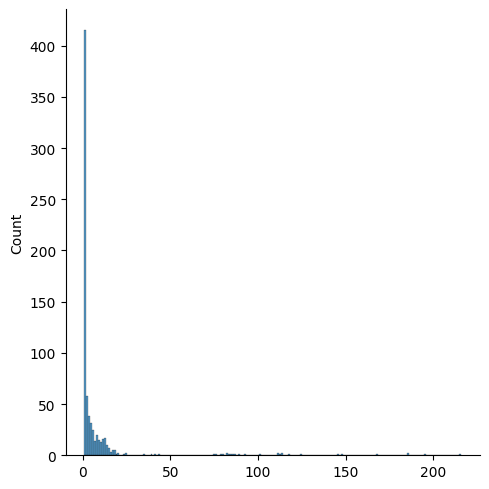

In [ ]:
sns.displot(len_dist)

In [ ]:
final['spam'].value_counts()

1    3000
0    3000
Name: spam, dtype: int64